In [101]:
import numpy as np
import pandas as pd
import tensorflow as  tf
import seaborn as sns
import matplotlib.pylab as plt

In [102]:
data = pd.read_csv("dataset/xurvzS.csv")
data = data.sample(frac = 1)
data = data.values

In [103]:
test_data = data[:700, :-1].astype("float")
test_label = data[:700,-1]
train_data = data[700:900,:-1].astype("float")
train_label = data[700:900,-1]
val_data = data[900:,:-1].astype("float")
val_label = data[900:,-1]

In [104]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
val_data -= mean
val_data /= std

In [105]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (8,)))
#model.add(layers.Dense(32, activation = 'relu')
model.add(layers.Dense(1))

In [106]:
model.compile(optimizer="rmsprop",loss = "mse", metrics = ["mae"])

In [107]:
history = model.fit(train_data,train_label, epochs = 200, validation_data = (val_data,val_label))

Train on 200 samples, validate on 130 samples
Epoch 1/200
200/200 [==============================] - 0s 625us/step - loss: 1461.8033 - mae: 34.3317 - val_loss: 1574.9392 - val_mae: 36.1312
Epoch 2/200
200/200 [==============================] - 0s 120us/step - loss: 1449.4146 - mae: 34.1581 - val_loss: 1563.5245 - val_mae: 35.9820
Epoch 3/200
200/200 [==============================] - 0s 105us/step - loss: 1439.8922 - mae: 34.0276 - val_loss: 1553.0551 - val_mae: 35.8453
Epoch 4/200
200/200 [==============================] - 0s 130us/step - loss: 1430.9771 - mae: 33.9034 - val_loss: 1543.2063 - val_mae: 35.7166
Epoch 5/200
200/200 [==============================] - 0s 150us/step - loss: 1422.5567 - mae: 33.7877 - val_loss: 1533.6549 - val_mae: 35.5917
Epoch 6/200
200/200 [==============================] - 0s 160us/step - loss: 1414.2459 - mae: 33.6724 - val_loss: 1524.9436 - val_mae: 35.4752
Epoch 7/200
200/200 [==============================] - 0s 150us/step - loss: 1406.5590 - mae: 33

Epoch 58/200
200/200 [==============================] - 0s 140us/step - loss: 855.0165 - mae: 25.2296 - val_loss: 893.8741 - val_mae: 26.2978
Epoch 59/200
200/200 [==============================] - 0s 130us/step - loss: 841.3621 - mae: 25.0004 - val_loss: 878.2937 - val_mae: 26.0436
Epoch 60/200
200/200 [==============================] - 0s 130us/step - loss: 827.1526 - mae: 24.7586 - val_loss: 862.7029 - val_mae: 25.7888
Epoch 61/200
200/200 [==============================] - 0s 120us/step - loss: 812.9770 - mae: 24.5107 - val_loss: 847.3993 - val_mae: 25.5358
Epoch 62/200
200/200 [==============================] - 0s 115us/step - loss: 798.9822 - mae: 24.2650 - val_loss: 832.0544 - val_mae: 25.2793
Epoch 63/200
200/200 [==============================] - 0s 110us/step - loss: 784.7010 - mae: 24.0140 - val_loss: 815.6245 - val_mae: 25.0028
Epoch 64/200
200/200 [==============================] - 0s 120us/step - loss: 769.9258 - mae: 23.7604 - val_loss: 799.6366 - val_mae: 24.7360
Epoch 

Epoch 173/200
200/200 [==============================] - 0s 150us/step - loss: 128.4325 - mae: 8.8559 - val_loss: 187.8130 - val_mae: 10.0972
Epoch 174/200
200/200 [==============================] - 0s 140us/step - loss: 128.0184 - mae: 8.8528 - val_loss: 187.1076 - val_mae: 10.0849
Epoch 175/200
200/200 [==============================] - 0s 120us/step - loss: 127.6732 - mae: 8.8406 - val_loss: 186.1351 - val_mae: 10.0610
Epoch 176/200
200/200 [==============================] - 0s 115us/step - loss: 127.2391 - mae: 8.8353 - val_loss: 185.9892 - val_mae: 10.0529
Epoch 177/200
200/200 [==============================] - 0s 125us/step - loss: 126.9696 - mae: 8.8303 - val_loss: 185.7732 - val_mae: 10.0401
Epoch 178/200
200/200 [==============================] - 0s 135us/step - loss: 126.5887 - mae: 8.8183 - val_loss: 185.1855 - val_mae: 10.0249
Epoch 179/200
200/200 [==============================] - 0s 140us/step - loss: 126.1859 - mae: 8.8091 - val_loss: 184.3760 - val_mae: 10.0062
Epoch 

In [115]:
history.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

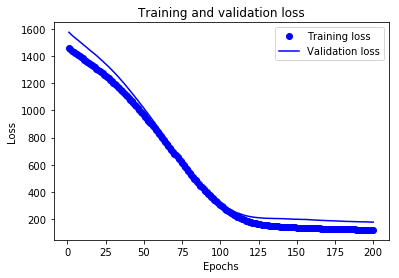

In [117]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


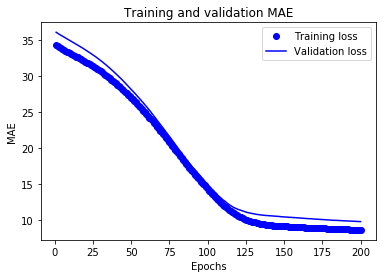

In [119]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, mae, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [120]:
model.evaluate(test_data,test_label)

700/700 [==============================] - 0s 41us/step


[176.54497532435826, 10.403753280639648]